In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('/content/scores_data.csv')

In [19]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [20]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


In [21]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [23]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [24]:
df = df.rename(columns={col: col.strip() for col in df.columns})
print(df.columns)

Index(['Batch', 'User_ID', 'Score'], dtype='object')


In [26]:
df['Cleaned Score'] = df['Score'].apply(lambda x: int(x.split(' / ')[0]))
print(df.head())

        Batch  User_ID  Score  Cleaned Score
0  AI_ELITE_7  uid_149  6 / 7              6
1  AI_ELITE_7  uid_148  6 / 7              6
2  AI_ELITE_7  uid_147  7 / 7              7
3  AI_ELITE_7  uid_146  7 / 7              7
4  AI_ELITE_7  uid_145  4 / 7              4


In [27]:
batch_stats = df.groupby('Batch')['Cleaned Score'].agg(['mean', 'median', 'std', 'min', 'max'])
print(batch_stats)

                mean  median       std  min  max
Batch                                           
AI_ELITE_4  3.791667     4.0  1.443376    0    7
AI_ELITE_6  4.229167     4.0  1.640441    0    7
AI_ELITE_7  5.056604     5.0  1.446682    2    7


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

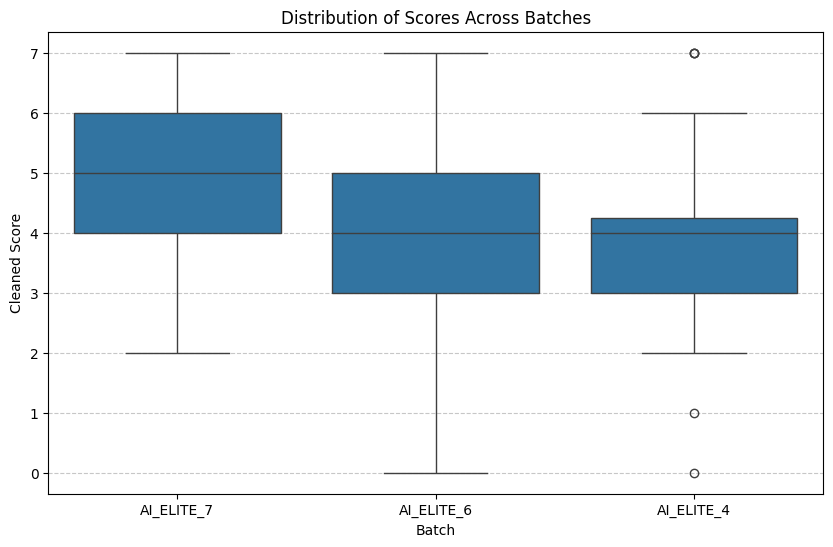

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Batch', y='Cleaned Score', data=df)
plt.title('Distribution of Scores Across Batches')
plt.xlabel('Batch')
plt.ylabel('Cleaned Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()